##**Module 5: MNIST Data Handling and Softmax Implementation**

In this notebook, we will implement and test the MnistData class, along with its supporting methods and functions like softmax. The notebook will demonstrate:

1. Implementation of the `MnistData` class to load, download, and preprocess MNIST data.
2. A new stable softmax function to avoid overflow errors.
3. Verification of loaded images and labels.
4. Example of a one-hot-encoded label.
5. Testing the MnistData class with sample images from both the train and test datasets.


##**Step 1: Softmax Function Implementation**

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def softmax(x):
    """Standard softmax function."""
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=0)

def stable_softmax(x):
    """Softmax function to prevent overflow by subtracting the maximum value."""
    shift_x = x - np.max(x)
    exp_shift_x = np.exp(shift_x)
    return exp_shift_x / np.sum(exp_shift_x, axis=0)

# Testing softmax functions with sample inputs
scores = np.array([1000, 1001, 1002])

print("Standard softmax:", softmax(scores))
print("Stable softmax:", stable_softmax(scores))


Standard softmax: [nan nan nan]
Stable softmax: [0.09003057 0.24472847 0.66524096]


##**Step 2: MnistData Class Implementation**

In [2]:
import os
import gzip
import urllib.request
import pickle
import matplotlib.pyplot as plt

class MnistData:
    def __init__(self):
        self.dataset_url = 'http://yann.lecun.com/exdb/mnist/'
        self.files = {
            'train_images': 'train-images-idx3-ubyte.gz',
            'train_labels': 'train-labels-idx1-ubyte.gz',
            'test_images': 't10k-images-idx3-ubyte.gz',
            'test_labels': 't10k-labels-idx1-ubyte.gz'
        }
        self.dataset = None

    def _download(self, filename):
        """Download a single MNIST file."""
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(self.dataset_url + filename, filename)

    def _download_all(self):
        """Download all MNIST dataset files if they are not present."""
        for filename in self.files.values():
            if not os.path.exists(filename):
                self._download(filename)

    def _load_images(self, filename):
        """Load image data from a gzipped file."""
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
        return data

    def _load_labels(self, filename):
        """Load label data from a gzipped file."""
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data

    def _create_dataset(self):
        """Create the dataset by loading training and test images and labels."""
        train_images = self._load_images(self.files['train_images'])
        train_labels = self._load_labels(self.files['train_labels'])
        test_images = self._load_images(self.files['test_images'])
        test_labels = self._load_labels(self.files['test_labels'])
        self.dataset = {
            'train': (train_images, self._change_one_hot_label(train_labels)),
            'test': (test_images, self._change_one_hot_label(test_labels))
        }
        # Save to a pickle file
        with open('mnist.pkl', 'wb') as f:
            pickle.dump(self.dataset, f)

    def _change_one_hot_label(self, labels, num_classes=10):
        """Convert labels to one-hot encoding."""
        one_hot = np.zeros((labels.size, num_classes))
        for i, label in enumerate(labels):
            one_hot[i, label] = 1
        return one_hot

    def load(self):
        """Load the dataset, downloading if necessary."""
        if not os.path.exists('mnist.pkl'):
            self._download_all()
            self._create_dataset()
        else:
            with open('mnist.pkl', 'rb') as f:
                self.dataset = pickle.load(f)
        return self.dataset['train'], self.dataset['test']

    def display_image(self, dataset_type, index):
        """Display a single image from the dataset."""
        if self.dataset is None:
            self.load()

        images, labels = self.dataset[dataset_type]
        image = images[index].reshape(28, 28)
        label = np.argmax(labels[index])  # Use argmax to get the original label

        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.show()


##**Step 3: Loading and Displaying the Dataset**

In [3]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset using TensorFlow/Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range of [0, 1] by dividing by 255
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


##**Step 4: Display Sample Images and Labels**

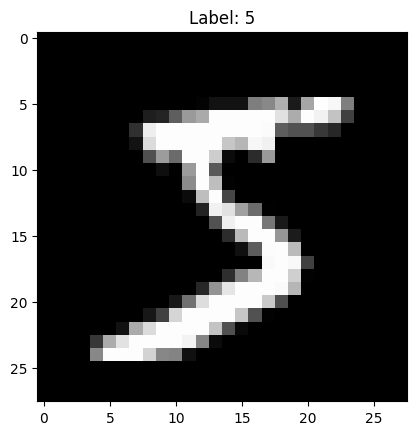

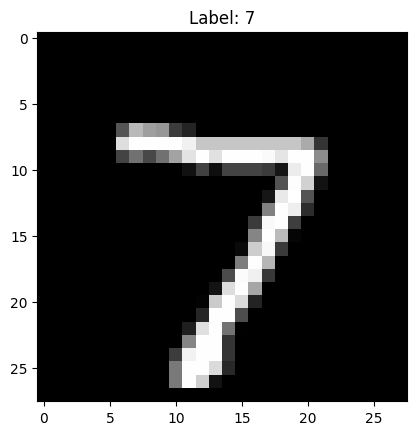

In [4]:
# Display a sample training image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Display a sample test image
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Label: {test_labels[0]}")
plt.show()


##**Step 5: Display One-Hot Encoded Label Example**

In [5]:
# Convert the labels to one-hot encoding using TensorFlow/Keras utilities
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Display one-hot-encoded label example for the first training image
print("One-hot encoded label (train[0]):", train_labels_one_hot[0])

One-hot encoded label (train[0]): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##**Step 6: Testing MnistData Class with Four Examples**

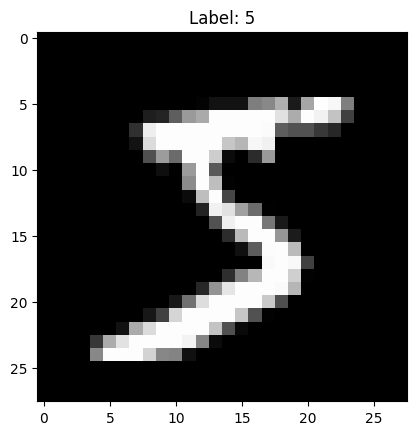

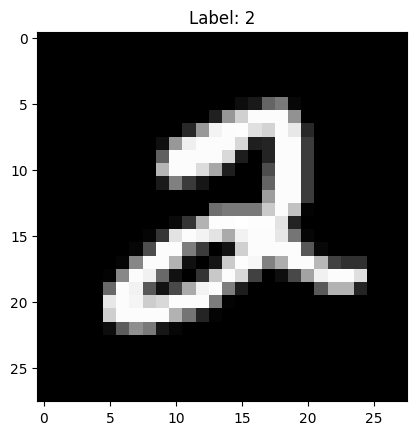

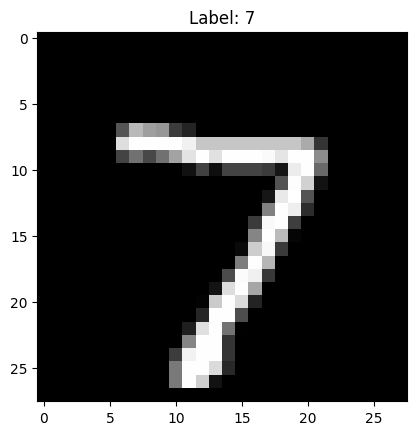

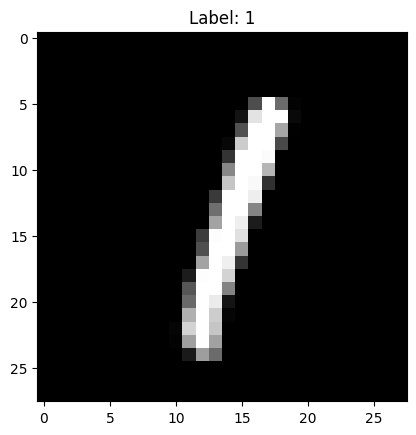

In [6]:
# Display two training and two test images along with their labels

# First training image
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Second training image
plt.imshow(train_images[5], cmap='gray')
plt.title(f"Label: {train_labels[5]}")
plt.show()

# First test image
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Label: {test_labels[0]}")
plt.show()

# Second test image
plt.imshow(test_images[5], cmap='gray')
plt.title(f"Label: {test_labels[5]}")
plt.show()

##**Step 7: Softmax Function Testing**

In [7]:
# Softmax and Stable Softmax function
def softmax(x):
    """Standard softmax function."""
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=0)

def stable_softmax(x):
    """Softmax function to prevent overflow by subtracting the maximum value."""
    shift_x = x - np.max(x)
    exp_shift_x = np.exp(shift_x)
    return exp_shift_x / np.sum(exp_shift_x, axis=0)

# Test softmax and stable softmax with a sample array
scores = np.array([1000, 1001, 1002])

print("Softmax result:", softmax(scores))
print("Stable softmax result:", stable_softmax(scores))

Softmax result: [nan nan nan]
Stable softmax result: [0.09003057 0.24472847 0.66524096]
